In [1]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import pandas as pd
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
data = pd.read_csv("../../Data/clustering/Data Clustering.csv")
df = data.copy()

df.head()

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata
0,Customer 0,134921,12,11244
1,Customer 1,20672,3,6891
2,Customer 2,17148,4,4287
3,Customer 3,381243,4,95311
4,Customer 4,10,0,10


Text(0, 0.5, 'Density')

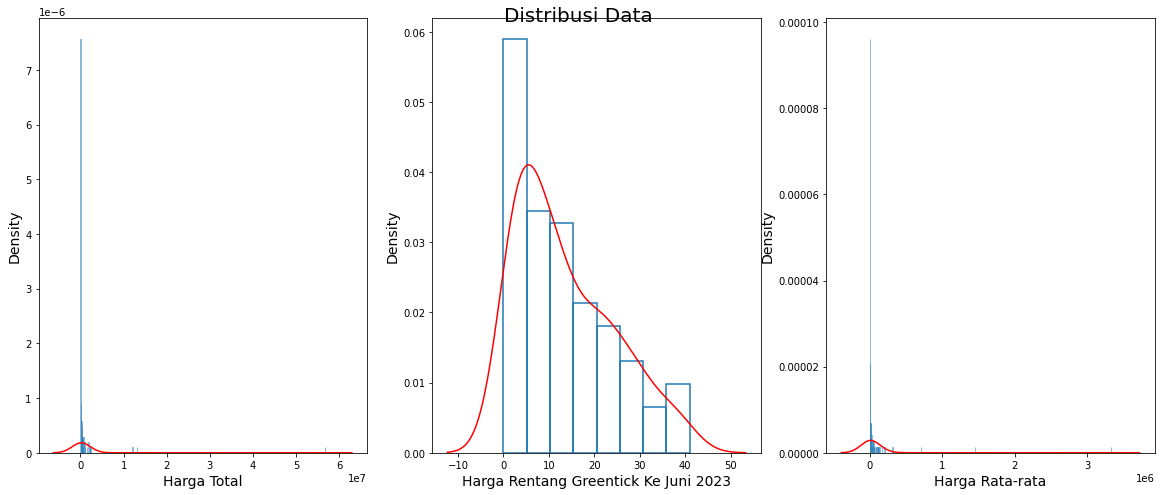

In [3]:
# make plot to see the distribution of the data
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle("Distribusi Data", fontsize=20, y=0.9)
sns.histplot(df["Total"], ax=ax[0], fill=False, stat="density").set_xlabel('Harga Total', fontsize=14)
sns.kdeplot(df["Total"], ax=ax[0], color="red").set_ylabel('Density', fontsize=14)

sns.histplot(df["Rentang Greentick Ke Juni 2023"], ax=ax[1], fill=False, stat="density").set_xlabel('Harga Rentang Greentick Ke Juni 2023', fontsize=14)
sns.kdeplot(df["Rentang Greentick Ke Juni 2023"], color="red", ax=ax[1]).set_ylabel('Density', fontsize=14)

sns.histplot(df["Rata-rata"], ax=ax[2], fill=False, stat="density").set_xlabel('Harga Rata-rata', fontsize=14)
sns.kdeplot(df["Rata-rata"], color="red", ax=ax[2]).set_ylabel('Density', fontsize=14)

In [4]:
fitur = ['Total', 'Rentang Greentick Ke Juni 2023', 'Rata-rata']

X = df[fitur]
scaller = MinMaxScaler()
X = scaller.fit_transform(X)
X = pd.DataFrame(X, columns=fitur)

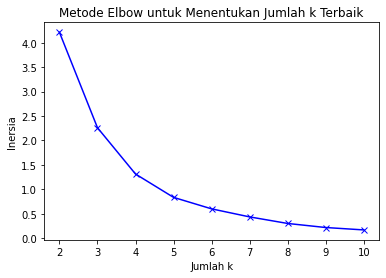

In [5]:
n_clusters = range(2, 11)
inertia = []
silhouette = []
ch_index = []

for k in n_clusters:
    model = KMeans(n_clusters=k, max_iter=500, n_init=50, random_state=42)
    member = model.fit_predict(X, y=None) 

    silhouette_avg = silhouette_score(X, member)
    ch_index_score = calinski_harabasz_score(X, member)

    inertia.append(model.inertia_)
    silhouette.append(silhouette_avg)
    ch_index.append(ch_index_score)

plt.plot(n_clusters, inertia, 'bx-')
plt.xlabel('Jumlah k')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah k Terbaik')
plt.show()

In [6]:
for i, s, c in zip(n_clusters, silhouette, ch_index):
    silhouette_avg = silhouette.index(max(silhouette))
    ch_index_score = ch_index.index(max(ch_index))

    print(f"Jumlah Cluster = {i}\nSilhouette Score = {s}\nCH Index Score = {c}\n")

k_silhoutte = range(2, 11)[silhouette_avg]
k_ch_index = range(2, 11)[ch_index_score]

print('\nCluster Terbaik Berdasarkan CH Index dan Silhoutte Score')
print(f'Jumlah Cluster Silhoutte = {k_silhoutte}')
print(f'Nilai Silhoutte Score = {max(silhouette)}\n')

print(f'Jumlah Cluster CH Index = {k_ch_index}')
print(f'Nilai CH Index Score = {max(ch_index)}\n')

Jumlah Cluster = 2
Silhouette Score = 0.6343480726905277
CH Index Score = 169.74313377287834

Jumlah Cluster = 3
Silhouette Score = 0.6427048132797701
CH Index Score = 207.0439538140205

Jumlah Cluster = 4
Silhouette Score = 0.5613142333799158
CH Index Score = 263.3515289389647

Jumlah Cluster = 5
Silhouette Score = 0.5726699065402356
CH Index Score = 324.3211899958849

Jumlah Cluster = 6
Silhouette Score = 0.5805159976304833
CH Index Score = 366.92181452388036

Jumlah Cluster = 7
Silhouette Score = 0.5948174865975683
CH Index Score = 424.85202351032444

Jumlah Cluster = 8
Silhouette Score = 0.5599837357372445
CH Index Score = 529.5456248996408

Jumlah Cluster = 9
Silhouette Score = 0.5626562044355213
CH Index Score = 639.969135493779

Jumlah Cluster = 10
Silhouette Score = 0.5678881603828331
CH Index Score = 731.3306613313924


Cluster Terbaik Berdasarkan CH Index dan Silhoutte Score
Jumlah Cluster Silhoutte = 3
Nilai Silhoutte Score = 0.6427048132797701

Jumlah Cluster CH Index = 10


In [7]:
distance_matrix = pairwise_distances(X, metric='euclidean')

# Perform KMedoids clustering
n_clusters = 4
kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
member = kmedoids.fit_predict(X)

df['cluster'] = kmedoids.labels_
df['cluster'].value_counts()

3    39
1    33
0    28
2    19
Name: cluster, dtype: int64

In [8]:
df.groupby('cluster').describe().transpose()

cluster                                         0           1         2  \
Total                          count       28.000      33.000    19.000   
                               mean    726622.071  142945.970  1911.789   
                               std    2486261.810  308762.358  4411.817   
                               min        279.000       5.000     0.000   
                               25%      12070.500    1871.000     4.500   
                               50%      54129.000   17148.000    18.000   
                               75%     172271.750   82788.000   391.500   
                               max   13092618.000 1578066.000 16770.000   
Rentang Greentick Ke Juni 2023 count       28.000      33.000    19.000   
                               mean        12.536       5.545     1.526   
                               std          2.134       1.660     0.964   
                               min          9.000       3.000     0.000   
                               25%         11.000       4.000     1.000   
                               50%         12.000       5.000     1.000   
                               75%         14.000       7.000     2.000   
                               max         16.000       8.000     3.000   
Rata-rata                      count       28.000      33.000    19.000   
                               mean     73291.036   26479.485   756.947   
                               std     275135.764   59973.294  1547.976   
                               min         28.000       1.000     0.000   
                               25%       1093.500     312.000     4.500   
                               50%       3622.500    3713.000    10.000   
                               75%      14310.250   20697.000   203.000   
                               max    1454736.000  315614.000  5590.000   

cluster                                         3  
Total                          count       39.000  
                               mean   2105927.744  
                               std    9180253.771  
                               min          0.000  
                               25%      32797.500  
                               50%     159541.000  
                               75%     447597.500  
                               max   56674832.000  
Rentang Greentick Ke Juni 2023 count       39.000  
                               mean        26.769  
                               std          6.450  
                               min         19.000  
                               25%         20.500  
                               50%         25.000  
                               75%         31.000  
                               max         41.000  
Rata-rata                      count       39.000  
                               mean    123878.590  
                               std     540014.903  
                               min          0.000  
                               25%       1929.500  
                               50%       9385.000  
                               75%      26330.000  
                               max    3333814.000

In [9]:
df.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)

C:\Users\Jayy\AppData\Local\Temp\ipykernel_6344\1642471285.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster').mean().sort_values(by='Rata-rata', ascending=False)


,Total,Rentang Greentick Ke Juni 2023,Rata-rata
cluster,,,
3,2105927.744,26.769,123878.590
0,726622.071,12.536,73291.036
1,142945.970,5.545,26479.485
2,1911.789,1.526,756.947


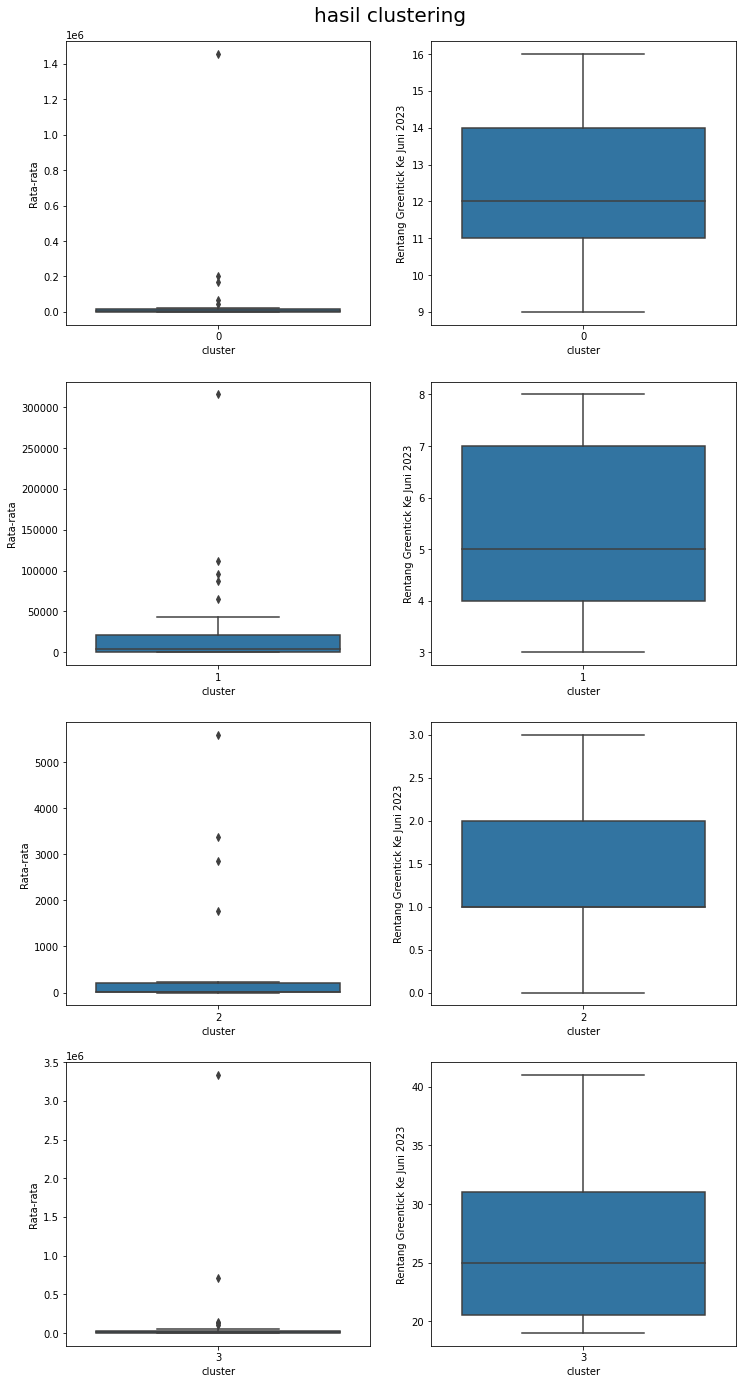

In [10]:
# make plot to see the distribution of the data
fig, ax = plt.subplots(n_clusters, 2, figsize=(12, n_clusters*6))
fig.suptitle("hasil clustering", fontsize=20, y=0.9)

for i in range(n_clusters):
    sns.boxplot(data=df[df['cluster'] == i], x='cluster', y='Rata-rata', ax=ax[i, 0])
    sns.boxplot(data=df[df['cluster'] == i], x='cluster', y='Rentang Greentick Ke Juni 2023', ax=ax[i, 1])

In [11]:
df[df['cluster'] == 1]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
1,Customer 1,20672,3,6891,1
2,Customer 2,17148,4,4287,1
3,Customer 3,381243,4,95311,1
5,Customer 5,82788,4,20697,1
6,Customer 6,61563,5,12313,1
7,Customer 7,541,6,91,1
9,Customer 9,1578066,5,315614,1
10,Customer 10,6,4,2,1
12,Customer 12,25989,7,3713,1
17,Customer 17,61245,7,8750,1


In [12]:
df[df['cluster'] == 2]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,cluster
4,Customer 4,10,0,10,2
20,Customer 20,189,2,95,2
21,Customer 21,169,0,169,2
22,Customer 22,310,2,155,2
23,Customer 23,4,1,4,2
27,Customer 27,97,1,97,2
33,Customer 33,10088,3,3363,2
36,Customer 36,473,2,237,2
40,Customer 40,2,1,2,2
47,Customer 47,8,1,8,2
